# 实验四：使用K-近邻模型实现空气质量的预测

## 任务一：使用Python自编程构建K近邻模型，实现空气质量的预测与评价。

In [54]:
# 请补充完整代码
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [55]:
# 请补充完整代码
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold

In [56]:
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False

In [57]:
# 请给代码做注释
def loadDataSet():
    # 读取训练数据
    data=pd.read_excel('北京市空气质量数据train.xlsx')
    # 替换0值未NaN
    data=data.replace(0,np.NaN)
    # 删除包含NaN值的行
    data=data.dropna()
    # 提取特征数据
    X=data.loc[:,['PM2.5','PM10','SO2','CO','NO2','O3']]
    # 提取目标变量
    Y=data.loc[:,'质量等级']
    # 返回特征和目标变量
    return [np.array(X),np.array(Y)]

In [58]:
def loadDataSetTest():
    data = pd.read_excel('北京市空气质量数据test.xlsx')
    data = data.replace(0, np.NaN)
    data = data.dropna()
    X = data.loc[:, ['PM2.5', 'PM10', 'SO2', 'CO', 'NO2', 'O3']]
    Y = data.loc[:, '质量等级']
    return [np.array(X), np.array(Y)]

In [59]:
# 请补充完整残缺代码
def myKNN(testDigit, trainX, trainY, k):
    """
    参数testDigit:输入的新实例（也即测试集中每一行数据特征）
    参数trainX：训练集中所有的数据特征
    参数trainY：训练集中对应的类别
    参数k：提前设置好的值，表示k个分类实例

    返回：输入的新实例的判定类别：maxIndex
    """

    ####自行编程，完成k-近邻算法的实现#####
    # 1.计算欧式距离
    distance = np.linalg.norm(trainX - testDigit, axis=1)
    # 2.按距离进行排序
    sortedDistIndices = np.argsort(distance)
    classCount = {}  # 存放各类别的个体数量
    for i in range(k):
        # 3.按顺序读取标签
        voteLabel = trainY[sortedDistIndices[i]]
        # 4.计算该标签次数
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1

    # 5.查找出现次数最多的类别，作为分类结果
    maxCount = 0
    maxIndex = -1
    for key, value in classCount.items():
        if value > maxCount:
            maxCount = value
            maxIndex = key

    return maxIndex

In [60]:
def show(testPre,K):
    plt.figure(figsize=(9, 6))
    plt.grid(True, linestyle='-.')
    plt.xticks(K)
    plt.plot(K, testPre, marker='.')
    plt.xlabel("K")
    plt.ylabel("测试精度")
    bestK = K[testPre.index(np.max(testPre))]
    plt.title("K-近邻的加权F1值的变化折线图\n(最优参数K=%d)" % bestK)
    plt.show()

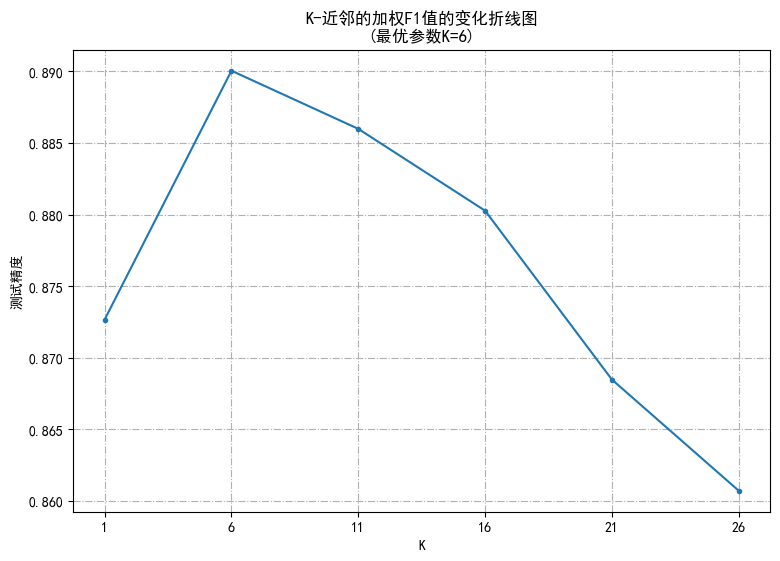

In [61]:
# 请补充完整残缺代码
[X, Y] = loadDataSet()
X= np.array(X)
Y= np.array(Y)

###使用验证集寻找最合适的k值###
testPre=[]
K=np.arange(1,30,5)
split=5
kf = KFold(n_splits=split, shuffle=False)
for k in K:
    score=0
    avg_score=0
    for train_index, valid_index in kf.split(X):
        X_train, X_valid = X[train_index], X[valid_index]
        Y_train, Y_valid = Y[train_index], Y[valid_index]
        numTestSamples = X_valid.shape[0]
        predict=[]
        for i in range(numTestSamples):
            re = myKNN(X_valid[i], X_train, Y_train, k)
            predict.append(re)
        score = score + metrics.f1_score(Y_valid, predict, average='weighted')
        avg_score = score / split
    testPre.append(avg_score)
show(testPre, K)

In [62]:
###使用测试集评估模型###
# 请补充完整残缺代码
[x_test, y_test] = loadDataSetTest()
numTestSamples = x_test.shape[0]
predict= []
bestK = K[testPre.index(np.max(testPre))]
for i in range(numTestSamples):
    re = myKNN(x_test[i], X, Y, bestK)
    predict.append(re)

F1=metrics.f1_score(y_test, predict, average='weighted')
print('加权F值：', F1)
print('评价模型结果：\n', classification_report(y_test, predict))

加权F值： 0.924185533915133
评价模型结果：
               precision    recall  f1-score   support

        中度污染       0.91      0.85      0.88        34
           优       0.94      0.97      0.96       101
           良       0.93      0.95      0.94       186
        轻度污染       0.90      0.87      0.89        95
        重度污染       1.00      0.78      0.88         9

    accuracy                           0.92       425
   macro avg       0.94      0.88      0.91       425
weighted avg       0.92      0.92      0.92       425



## 任务二：使用sklearn中K近邻模型，对空气质量数据进行预测分类与评价

In [63]:
# 请类比任务一，独立完成此任务。

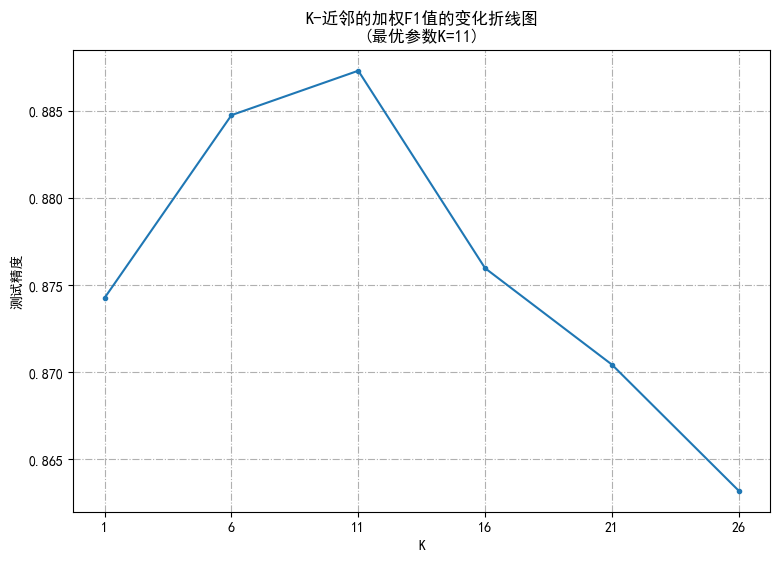

加权F值： 0.8990355218768793
评价模型结果：
               precision    recall  f1-score   support

        中度污染       0.84      0.76      0.80        34
           优       0.92      0.96      0.94       101
           良       0.90      0.95      0.92       186
        轻度污染       0.90      0.82      0.86        95
        重度污染       1.00      0.56      0.71         9

    accuracy                           0.90       425
   macro avg       0.91      0.81      0.85       425
weighted avg       0.90      0.90      0.90       425



In [64]:
from sklearn.neighbors import KNeighborsClassifier

# 加载数据
[X_train, Y_train] = loadDataSet()
[X_test, Y_test] = loadDataSetTest()

# 寻找最优的K值
testPre = []
K = np.arange(1, 30, 5)
split = 5
kf = KFold(n_splits=split, shuffle=False)

for k in K:
    score = 0
    for train_index, valid_index in kf.split(X_train):
        X_train_cv, X_valid_cv = X_train[train_index], X_train[valid_index]
        Y_train_cv, Y_valid_cv = Y_train[train_index], Y_train[valid_index]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_cv, Y_train_cv)
        Y_pred_cv = knn.predict(X_valid_cv)
        score += metrics.f1_score(Y_valid_cv, Y_pred_cv, average='weighted')
    avg_score = score / split
    testPre.append(avg_score)
show(testPre, K)

# 选择最佳K值，重新训练模型并预测
bestK = K[testPre.index(np.max(testPre))]
knn = KNeighborsClassifier(n_neighbors=bestK)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

F1 = metrics.f1_score(Y_test, Y_pred, average='weighted')
print('加权F值：', F1)
print('评价模型结果：\n', classification_report(Y_test, Y_pred))